In [25]:
import pandas as pd
import os

## ShARe dataset

In [26]:
df = pd.read_stata('..\data\external\sharew9_rel9-0-0_ph.dta')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_14432\1572789444.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_stata('..\data\external\sharew9_rel9-0-0_ph.dta')


,mergeid,hhid9,mergeidp9,coupleid9,country,language,ph003_,ph004_,ph005_,ph006d1,...,ph089d2,ph089d3,ph089d4,ph089dno,ph095_,ph690d1,ph690d2,ph690d3,ph690d4,ph745_
0,AT-000787-01,AT-000787-A,AT-000787-02,AT-000787-01-02,Austria,German (at),Very good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,Yes
1,AT-001492-01,AT-001492-A,AT-001492-02,AT-001492-01-02,Austria,German (at),Good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Selected,Not selected,No
2,AT-001492-02,AT-001492-A,AT-001492-01,AT-001492-01-02,Austria,German (at),Excellent,Yes,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,2.0,Selected,Not selected,Selected,Not selected,No
3,AT-001719-01,AT-001719-A,AT-001719-02,AT-001719-01-02,Austria,German (at),Poor,Yes,Severely limited,Selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,No
4,AT-001719-02,AT-001719-A,AT-001719-01,AT-001719-01-02,Austria,German (at),Fair,Yes,"Limited, but not severely",Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69442,SK-992332-01,SK-992332-A,SK-992332-02,SK-992332-01-02,Slovakia,Slovakian,Good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,No
69443,SK-992332-02,SK-992332-A,SK-992332-01,SK-992332-01-02,Slovakia,Slovakian,Good,No,Not limited,Not selected,...,Not selected,Not selected,Not selected,Selected,NaN,Selected,Not selected,Not selected,Not selected,No
69444,SK-995042-01,SK-995042-A,SK-995042-02,SK-995042-01-02,Slovakia,Slovakian,Poor,Yes,Severely limited,Selected,...,Selected,Selected,Selected,Not selected,8.0,Selected,Not selected,Not selected,Not selected,No
69445,SK-995042-02,SK-995042-A,SK-995042-01,SK-995042-01-02,Slovakia,Slovakian,Good,No,Not limited,Not selected,...,Not selected,Not selected,Selected,Not selected,NaN,Selected,Not selected,Not selected,Not selected,No


## CADEC dataset

### Read files to pandas df

In [27]:
path = "..//data//external//cadec//original"
dir_list = os.listdir(path)

In [28]:
cadec_df = pd.concat((pd.read_csv(f'{path}//{f}', sep='\t', names=['tag_number', 'entity_type_offsets', 'text']) for f in dir_list), ignore_index=True)
cadec_df

,tag_number,entity_type_offsets,text
0,T1,ADR 9 19,bit drowsy
1,#1,AnnotatorNotes T1,Drowsy
2,T2,ADR 29 50,little blurred vision
3,#2,AnnotatorNotes T2,Blurred Vision
4,T3,Drug 93 102,Arthrotec
...,...,...,...
9681,T6,Symptom 241 251,Lupus pain
9682,T7,Symptom 294 323,pain from the herniated discs
9683,T10,Finding 397 408,disc issues
9684,T8,Drug 528 534,Zipsor


In [29]:
cadec_df.entity_type_offsets = cadec_df.entity_type_offsets.str.split().str.get(0)      # Extract entity types from entity_type_offsets
cadec_df = cadec_df.rename(columns={"entity_type_offsets": "entity_type"})              # Rename column
cadec_df = cadec_df[ -cadec_df.tag_number.str.startswith('#')]                          # Remove annotation notes
cadec_df = cadec_df[['entity_type', 'text']]                                            # Leave only 'entity_type' and 'text' columns
cadec_df = cadec_df.reset_index(drop=True)                                              # Reset index
cadec_df

,entity_type,text
0,ADR,bit drowsy
1,ADR,little blurred vision
2,Drug,Arthrotec
3,Disease,arthritis
4,Symptom,agony
...,...,...
9106,Symptom,Lupus pain
9107,Symptom,pain from the herniated discs
9108,Finding,disc issues
9109,Drug,Zipsor


### Examine cadec dataset

In [30]:
print(cadec_df.isna().sum())
print(cadec_df.isnull().sum())

entity_type    0
text           0
dtype: int64
entity_type    0
text           0
dtype: int64


In [31]:
cadec_df.entity_type.value_counts()

entity_type
ADR        6318
Drug       1800
Finding     435
Disease     283
Symptom     275
Name: count, dtype: int64

## Cosine similarity

In [32]:
import numpy as np   

def cosine(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

## Text embeddings

### A) Load embeddings from glove
https://nlp.stanford.edu/projects/glove/

In [33]:
def load_embeddings(path):
    mapping = dict()
    
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if len(line) == 0:
                continue
            splitted = line.split(" ")
            mapping[splitted[0]] = np.array(splitted[1:], dtype=float)
    return mapping

glove_mapping = load_embeddings('..\data\external\glove.6B.50d.txt')

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_14432\201775698.py:13: SyntaxWarning: invalid escape sequence '\d'
  glove_mapping = load_embeddings('..\data\external\glove.6B.50d.txt')


In [34]:
print(glove_mapping['knee'])

[-0.21882  -0.052644 -0.71709  -0.37229  -1.0281    1.1978   -0.30328
  0.77862   0.25025  -0.62951   0.78612   0.088139 -2.0231    0.10228
  0.75425   0.91266  -0.91146  -1.0711   -0.48096   0.14938  -1.9889
  0.62956  -0.057451 -0.911    -0.25967  -0.95332   0.7802    1.23
  0.62747  -0.40826   2.3747    1.0017    0.79222   0.50754   0.41479
  1.443     1.3825    0.824     1.006    -0.53828  -0.86842   0.32278
 -0.42077   0.19046   0.36496  -0.30488   1.0468   -0.2758   -0.45969
 -0.014299]


### B) Load embeddings from pretrained fasttext model

In [35]:
from gensim.models import FastText


model = FastText.load('..//models//cadec_corpus_01.ft')
ft_mapping = model.wv

In [51]:
ft_mapping['knee']

array([ 0.05848758, -0.31545046,  0.22407474, -0.22938226,  0.14228429,
       -0.08871201, -0.2282028 , -0.08908903,  0.34998113,  0.1888631 ,
       -0.07596505,  0.19966607,  0.12539007,  0.13188556,  0.11477008,
        0.28421518,  0.14486554,  0.2199532 ,  0.34383518,  0.13293807,
       -0.29564187,  0.09358893, -0.05499073,  0.03750245, -0.16615738,
       -0.13009684,  0.4119399 , -0.30855405, -0.11533014, -0.1892448 ,
       -0.31928208, -0.40049994, -0.47184455, -0.16303451, -0.09280337,
       -0.03849113, -0.12354192,  0.06955361,  0.31880638,  0.37029827,
        0.09617181,  0.27211085, -0.02327759, -0.06471575,  0.25037628,
        0.23985676,  0.24389248,  0.04888532,  0.1001148 ,  0.32656622,
       -0.37387517,  0.00081692, -0.00748951,  0.14167729, -0.116758  ,
       -0.54173666, -0.0114517 , -0.20850225, -0.24585906, -0.31670544,
        0.24575777, -0.0141519 , -0.3156632 , -0.54699826, -0.2000771 ,
       -0.17116733,  0.22821833, -0.32593015, -0.23970257,  0.12

## Text to embeddings
Average vector of word vectors in a text.

In [36]:
import nltk
nltk.download('punkt') #https://www.nltk.org/data.html

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
from nltk.tokenize import word_tokenize

def document_to_avg_embedding(doc, embeddings):
    
    doc_embeddings = []
    doc = str.lower(doc)
    tokens = word_tokenize(doc)

    for token in tokens:

        try:
            if token in embeddings.keys():
                doc_embeddings.append(embeddings[token])
        except AttributeError as e:
            if token in embeddings.key_to_index.keys():
                doc_embeddings.append(embeddings[token])
    
    avg_embedding = np.mean(np.array(doc_embeddings), axis=0)

    return avg_embedding

## Cosine similarity between docs

In [44]:
def cosine_sim_between_docs(doc1, doc2, embeddings, verbose=False):

    v1 = document_to_avg_embedding(doc1, embeddings)
    v2 = document_to_avg_embedding(doc2, embeddings)

    # If there is no embedings for a doc, return 0.0 (a != a returns true for NaNs).
    try: any(v1 != v1)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc1}.')
        return 0.0
    
    try: any(v2 != v2)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc2}.')
        return 0.0
    
    cosine_sim = cosine(v1, v2)


    if verbose:
        print(f'Cosine similarity between {doc1} and {doc2} is:\n{cosine_sim}\n')

    return cosine_sim

In [54]:
mapping = ft_mapping
verbose = True                                                                                        # glove   FastText
cosine_sim_between_docs("Mary had a little lamb", "Mary had a little lamb", mapping, verbose=verbose) # 1.0     1.0
cosine_sim_between_docs("Mary had a little lamb", "Mary had a small lamb", mapping, verbose=verbose) #  0.980790094274271   0.9368882775306702
cosine_sim_between_docs("Mary had a little lamb", "Mery hat a littlelamb", mapping, verbose=verbose) #  0.649791857568839   0.712941586971283
cosine_sim_between_docs("Mary had a little lamb", "Mary had a lamb", mapping, verbose=verbose) #        0.9851323292949361  0.9130943417549133
cosine_sim_between_docs("Mary had a little lamb", "Mary had a little lamb and a big cow", mapping, verbose=verbose) #0.9759368866608763 0.9416894316673279
cosine_sim_between_docs("Mary had a little lamb", "A girl had a small sheep", mapping, verbose=verbose) #0.8991286073011774 0.9330006241798401
cosine_sim_between_docs("Mary had a little lamb", "This old man, he played one", mapping, verbose=verbose) #0.906964976899118   0.7090077996253967
cosine_sim_between_docs("Mary had a little lamb", "Twinkle Twinkle Little Star How I wonder what you are!", mapping, verbose=verbose) #0.7681287321680009   0.6525208353996277
cosine_sim_between_docs("Mary had a little lamb", "Your STIHL earth auger uses an oil-gasoline mixture for fuel (see the chapter on Fuel in your owner's manual).", mapping, verbose=verbose) #0.8210465662463234   0.6533670425415039

Cosine similarity between Mary had a little lamb and Mary had a little lamb is:
1.0

Cosine similarity between Mary had a little lamb and Mary had a small lamb is:
0.9368882775306702

Cosine similarity between Mary had a little lamb and Mery hat a littlelamb is:
0.712941586971283

Cosine similarity between Mary had a little lamb and Mary had a lamb is:
0.9130943417549133

Cosine similarity between Mary had a little lamb and Mary had a little lamb and a big cow is:
0.9416894316673279

Cosine similarity between Mary had a little lamb and A girl had a small sheep is:
0.9330006241798401

Cosine similarity between Mary had a little lamb and This old man, he played one is:
0.7090077996253967

Cosine similarity between Mary had a little lamb and Twinkle Twinkle Little Star How I wonder what you are! is:
0.6525208353996277

Cosine similarity between Mary had a little lamb and Your STIHL earth auger uses an oil-gasoline mixture for fuel (see the chapter on Fuel in your owner's manual). is:
0.65

0.65336704

### Tests on CADEC

In [55]:
cadec_grouped = cadec_df.groupby('entity_type')
cadec_sample = cadec_grouped.sample(n=5, random_state=379).reset_index(drop=True)

type_dict = {'ADR':0, 'Disease':1, 'Drug':2, 'Finding':3, 'Symptom':4}
cadec_sample.entity_type = cadec_sample.entity_type.map(type_dict)
cadec_sample.head(10)

,entity_type,text
0,0,irretractable lower back pain
1,0,muscle weakness causing nerve damage and imbal...
2,0,irritable
3,0,BP was extrememly high
4,0,decreased stamina
5,1,rheumatoid arthritis
6,1,osteoarthritis
7,1,hypothyroidism
8,1,diabetes
9,1,Thyroid disease


In [58]:
def calculate_similarity_matrix(cadec_sample, mapping):
    similarity_matrix = np.zeros((5,5))
    count_matrix = np.zeros((5,5))

    for index_i, row_i in cadec_sample.iterrows():
        for index_j, row_j in cadec_sample.iterrows():
            
            # Do not calculate simmilarities for the same entities
            # to not overestimate the score within the same group.
            if index_i != index_j:
                similarity_matrix[row_i.entity_type][row_j.entity_type] += cosine_sim_between_docs(row_i.text, row_j.text, mapping, verbose=False)
                count_matrix[row_i.entity_type][row_j.entity_type] += 1

    similarity_matrix /= count_matrix
    return similarity_matrix
    

In [60]:
import matplotlib.pyplot as plt

def plot_similarity_matrix(similarity_matrix):
    
    plt.imshow(similarity_matrix, vmin=-1, vmax=1, extent=[0, 5, 0, 5]) 
    for i in range(5): 
        for j in range(5): 
            plt.annotate(str(round(similarity_matrix[i][j], 3)),
                        xy=(j+0.5, i+0.7), 
                        ha='center', va='center', color='white') 
            
    plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


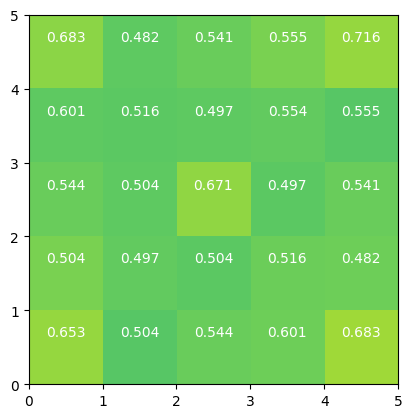

In [62]:
similarity_matrix = calculate_similarity_matrix(cadec_sample, ft_mapping)
plot_similarity_matrix(similarity_matrix)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


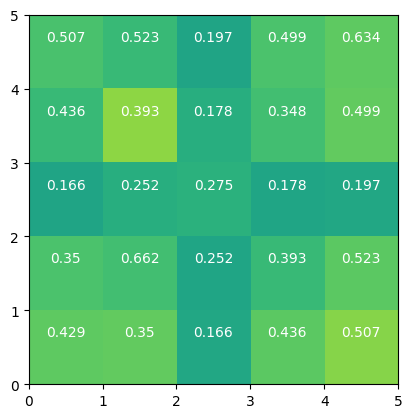

In [63]:
similarity_matrix = calculate_similarity_matrix(cadec_sample, glove_mapping)
plot_similarity_matrix(similarity_matrix)